In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import re

#set the graphs to show in the jupyter notebook
%matplotlib inline

#set seabor graphs to a better style
sns.set(style="ticks")

In [2]:
customer_acq=pd.read_csv('F:\Analytix_Labs\Python for data science\Case_Study\Python Foundation Case Study 2 - Credit Card Case Study\Customer Acqusition.csv')
print(customer_acq)

     No Customer  Age        City   Product     Limit Company        Segment
0     1       A1   76   BANGALORE      Gold  500000.0      C1  Self Employed
1     2       A2   71    CALCUTTA    Silver  100000.0      C2   Salaried_MNC
2     3       A3   34      COCHIN  Platimum   10000.0      C3   Salaried_Pvt
3     4       A4   47      BOMBAY  Platimum   10001.0      C4           Govt
4     5       A5   56   BANGALORE  Platimum   10002.0      C5  Normal Salary
..  ...      ...  ...         ...       ...       ...     ...            ...
95   96      A96   54     CHENNAI    Silver  100000.0     C19   Salaried_Pvt
96   97      A97   58  TRIVANDRUM  Platimum   10000.0     C20           Govt
97   98      A98   51    CALCUTTA  Platimum   10001.0     C21  Normal Salary
98   99      A99   35    CALCUTTA  Platimum   10002.0     C22  Self Employed
99  100     A100   36      COCHIN    Silver  100000.0      C5   Salaried_MNC

[100 rows x 8 columns]


In [3]:
repayment=pd.read_csv('F:\Analytix_Labs\Python for data science\Case_Study\Python Foundation Case Study 2 - Credit Card Case Study\Repayment.csv')
print(repayment)

      SL No: Customer      Month     Amount  Unnamed: 4
0        NaN       A1  12-Jan-04  495414.75         NaN
1        2.0       A1   3-Jan-04  245899.02         NaN
2        3.0       A1  15-Jan-04  259490.06         NaN
3        4.0       A1  25-Jan-04  437555.12         NaN
4        5.0       A1  17-Jan-05  165972.88         NaN
...      ...      ...        ...        ...         ...
1518     NaN      NaN        NaN        NaN         NaN
1519     NaN      NaN        NaN        NaN         NaN
1520     NaN      NaN        NaN        NaN         NaN
1521     NaN      NaN        NaN        NaN         NaN
1522     NaN      NaN        NaN        NaN         NaN

[1523 rows x 5 columns]


In [36]:
repayment['Month']=repayment['Month'].apply(lambda x:pd.to_datetime(x))
print(repayment)

      SL No: Customer      Month     Amount  Unnamed: 4
0        NaN       A1 2004-01-12  495414.75         NaN
1        2.0       A1 2004-01-03  245899.02         NaN
2        3.0       A1 2004-01-15  259490.06         NaN
3        4.0       A1 2004-01-25  437555.12         NaN
4        5.0       A1 2005-01-17  165972.88         NaN
...      ...      ...        ...        ...         ...
1518     NaN      NaN        NaT        NaN         NaN
1519     NaN      NaN        NaT        NaN         NaN
1520     NaN      NaN        NaT        NaN         NaN
1521     NaN      NaN        NaT        NaN         NaN
1522     NaN      NaN        NaT        NaN         NaN

[1523 rows x 5 columns]


In [4]:
spend=pd.read_csv('F:\Analytix_Labs\Python for data science\Case_Study\Python Foundation Case Study 2 - Credit Card Case Study\spend.csv')
print(spend)

      Sl No: Customer      Month        Type     Amount
0          1       A1  12-Jan-04   JEWELLERY  485470.80
1          2       A1   3-Jan-04       PETRO  410556.13
2          3       A1  15-Jan-04     CLOTHES   23740.46
3          4       A1  25-Jan-04        FOOD  484342.47
4          5       A1  17-Jan-05      CAMERA  369694.07
...      ...      ...        ...         ...        ...
1495    1496      A67   4-Feb-06  BUS TICKET  356872.73
1496    1497      A68  25-Mar-06  BUS TICKET  204971.10
1497    1498      A69  31-Mar-06  BUS TICKET   50449.44
1498    1499      A70  23-Mar-06  BUS TICKET   80593.94
1499    1500      A71  24-Mar-06  BUS TICKET  194447.62

[1500 rows x 5 columns]


In [38]:
spend['Month']=spend['Month'].apply(lambda x:pd.to_datetime(x))
print(spend)

      Sl No: Customer      Month        Type     Amount
0          1       A1 2004-01-12   JEWELLERY  485470.80
1          2       A1 2004-01-03       PETRO  410556.13
2          3       A1 2004-01-15     CLOTHES   23740.46
3          4       A1 2004-01-25        FOOD  484342.47
4          5       A1 2005-01-17      CAMERA  369694.07
...      ...      ...        ...         ...        ...
1495    1496      A67 2006-02-04  BUS TICKET  356872.73
1496    1497      A68 2006-03-25  BUS TICKET  204971.10
1497    1498      A69 2006-03-31  BUS TICKET   50449.44
1498    1499      A70 2006-03-23  BUS TICKET   80593.94
1499    1500      A71 2006-03-24  BUS TICKET  194447.62

[1500 rows x 5 columns]


In [5]:
customer_acq.dtypes

No            int64
Customer     object
Age           int64
City         object
Product      object
Limit       float64
Company      object
Segment      object
dtype: object

In [6]:
spend.dtypes

Sl No:        int64
Customer     object
Month        object
Type         object
Amount      float64
dtype: object

In [7]:
repayment.dtypes

SL No:        float64
Customer       object
Month          object
Amount        float64
Unnamed: 4    float64
dtype: object

In [8]:
customer_acq.head()

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4,A4,47,BOMBAY,Platimum,10001.0,C4,Govt
4,5,A5,56,BANGALORE,Platimum,10002.0,C5,Normal Salary


In [9]:
spend.head()

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13
2,3,A1,15-Jan-04,CLOTHES,23740.46
3,4,A1,25-Jan-04,FOOD,484342.47
4,5,A1,17-Jan-05,CAMERA,369694.07


In [10]:
repayment.head()

,SL No:,Customer,Month,Amount,Unnamed: 4
0,NaN,A1,12-Jan-04,495414.75,NaN
1,2.0,A1,3-Jan-04,245899.02,NaN
2,3.0,A1,15-Jan-04,259490.06,NaN
3,4.0,A1,25-Jan-04,437555.12,NaN
4,5.0,A1,17-Jan-05,165972.88,NaN


In [11]:
customer_acq.isnull().sum()

No          0
Customer    0
Age         0
City        0
Product     0
Limit       0
Company     0
Segment     0
dtype: int64

In [12]:
spend.isnull().sum()

Sl No:      0
Customer    0
Month       0
Type        0
Amount      0
dtype: int64

In [13]:
repayment.isnull().sum()

SL No:          24
Customer        23
Month           23
Amount          23
Unnamed: 4    1523
dtype: int64

## 1. In the above dataset,
## a. In case age is less than 18, replace it with mean of age values.

In [14]:
customer_acq.loc[customer_acq["Age"] < 18,"Age"] = customer_acq["Age"].mean()

In [15]:
print(customer_acq)

     No Customer   Age        City   Product     Limit Company        Segment
0     1       A1  76.0   BANGALORE      Gold  500000.0      C1  Self Employed
1     2       A2  71.0    CALCUTTA    Silver  100000.0      C2   Salaried_MNC
2     3       A3  34.0      COCHIN  Platimum   10000.0      C3   Salaried_Pvt
3     4       A4  47.0      BOMBAY  Platimum   10001.0      C4           Govt
4     5       A5  56.0   BANGALORE  Platimum   10002.0      C5  Normal Salary
..  ...      ...   ...         ...       ...       ...     ...            ...
95   96      A96  54.0     CHENNAI    Silver  100000.0     C19   Salaried_Pvt
96   97      A97  58.0  TRIVANDRUM  Platimum   10000.0     C20           Govt
97   98      A98  51.0    CALCUTTA  Platimum   10001.0     C21  Normal Salary
98   99      A99  35.0    CALCUTTA  Platimum   10002.0     C22  Self Employed
99  100     A100  36.0      COCHIN    Silver  100000.0      C5   Salaried_MNC

[100 rows x 8 columns]


### b. In case spend amount is more than the limit, replace it with 50% of that customer’s limit.

In [39]:
customer_spend = pd.merge(left=customer_acq,right=spend,on="Customer",how="inner")
print(customer_spend)

       No Customer   Age        City   Product     Limit Company  \
0       1       A1  76.0   BANGALORE      Gold  500000.0      C1   
1       1       A1  76.0   BANGALORE      Gold  500000.0      C1   
2       1       A1  76.0   BANGALORE      Gold  500000.0      C1   
3       1       A1  76.0   BANGALORE      Gold  500000.0      C1   
4       1       A1  76.0   BANGALORE      Gold  500000.0      C1   
...   ...      ...   ...         ...       ...       ...     ...   
1495   96      A96  54.0     CHENNAI    Silver  100000.0     C19   
1496   97      A97  58.0  TRIVANDRUM  Platimum   10000.0     C20   
1497   98      A98  51.0    CALCUTTA  Platimum   10001.0     C21   
1498   99      A99  35.0    CALCUTTA  Platimum   10002.0     C22   
1499  100     A100  36.0      COCHIN    Silver  100000.0      C5   

            Segment  Sl No:      Month        Type     Amount  
0     Self Employed       1 2004-01-12   JEWELLERY  485470.80  
1     Self Employed       2 2004-01-03       PETRO  410

### c. Incase the repayment amount is more than the limit, replace the repayment with the limit.

In [58]:
customer_repayment=pd.merge(left=customer_acq,right=repayment,on='Customer')
print(customer_repayment)

       No Customer   Age        City   Product     Limit Company  \
0       1       A1  76.0   BANGALORE      Gold  500000.0      C1   
1       1       A1  76.0   BANGALORE      Gold  500000.0      C1   
2       1       A1  76.0   BANGALORE      Gold  500000.0      C1   
3       1       A1  76.0   BANGALORE      Gold  500000.0      C1   
4       1       A1  76.0   BANGALORE      Gold  500000.0      C1   
...   ...      ...   ...         ...       ...       ...     ...   
1495   96      A96  54.0     CHENNAI    Silver  100000.0     C19   
1496   97      A97  58.0  TRIVANDRUM  Platimum   10000.0     C20   
1497   98      A98  51.0    CALCUTTA  Platimum   10001.0     C21   
1498   99      A99  35.0    CALCUTTA  Platimum   10002.0     C22   
1499  100     A100  36.0      COCHIN    Silver  100000.0      C5   

            Segment  SL No:      Month     Amount  Unnamed: 4  
0     Self Employed     NaN 2004-01-12  495414.75         NaN  
1     Self Employed     2.0 2004-01-03  245899.02      

In [59]:
customer_repayment['Amount']=np.where(customer_repayment.Amount>customer_repayment.Limit,customer_repayment.Limit/2,customer_repayment.Amount)

In [60]:
print(customer_spend)

       No Customer   Age        City   Product     Limit Company  \
0       1       A1  76.0   BANGALORE      Gold  500000.0      C1   
1       1       A1  76.0   BANGALORE      Gold  500000.0      C1   
2       1       A1  76.0   BANGALORE      Gold  500000.0      C1   
3       1       A1  76.0   BANGALORE      Gold  500000.0      C1   
4       1       A1  76.0   BANGALORE      Gold  500000.0      C1   
...   ...      ...   ...         ...       ...       ...     ...   
1495   96      A96  54.0     CHENNAI    Silver  100000.0     C19   
1496   97      A97  58.0  TRIVANDRUM  Platimum   10000.0     C20   
1497   98      A98  51.0    CALCUTTA  Platimum   10001.0     C21   
1498   99      A99  35.0    CALCUTTA  Platimum   10002.0     C22   
1499  100     A100  36.0      COCHIN    Silver  100000.0      C5   

            Segment  Sl No:      Month        Type     Amount  
0     Self Employed       1 2004-01-12   JEWELLERY  485470.80  
1     Self Employed       2 2004-01-03       PETRO  410

### 2. From the above dataset create the following summaries:

###  a. How many distinct customers exist?

In [45]:
customer_spend['Customer'].drop_duplicates().count()

100

###  b. How many distinct categories exist?

In [46]:
customer_spend['Customer'].drop_duplicates().count()

100

In [62]:
customer_repayment['Product'].drop_duplicates()

0         Gold
18      Silver
29    Platimum
Name: Product, dtype: object

In [48]:
customer_spend['Product'].drop_duplicates()

0         Gold
18      Silver
29    Platimum
Name: Product, dtype: object

###  c. What is the average monthly spend by customers?

In [27]:
customer_spend_amount=customer_spend.groupby(['Customer','Month'])[['Amount']].mean().reset_index()
print(customer_spend_amount)

     Customer      Month     Amount
0          A1   1-Feb-05   23370.20
1          A1  12-Jan-04  463017.01
2          A1  15-Jan-04   23740.46
3          A1  17-Jan-05  369694.07
4          A1  19-Apr-06  346925.68
...       ...        ...        ...
1252      A95  15-Jan-04  240401.50
1253      A96  25-Jan-04   54729.66
1254      A97  12-Jan-04    5000.00
1255      A98   3-Jan-04    5000.50
1256      A99  15-Jan-04    5001.00

[1257 rows x 3 columns]


In [56]:
customer_spend_amount['spend_month'] = pd.DatetimeIndex(customer_spend_amount['Month']).month
print(customer_spend_amount)

     Customer      Month     Amount  spend_month
0          A1   1-Feb-05   23370.20            2
1          A1  12-Jan-04  463017.01            1
2          A1  15-Jan-04   23740.46            1
3          A1  17-Jan-05  369694.07            1
4          A1  19-Apr-06  346925.68            4
...       ...        ...        ...          ...
1252      A95  15-Jan-04  240401.50            1
1253      A96  25-Jan-04   54729.66            1
1254      A97  12-Jan-04    5000.00            1
1255      A98   3-Jan-04    5000.50            1
1256      A99  15-Jan-04    5001.00            1

[1257 rows x 4 columns]


In [57]:
monthly_spend=customer_spend_amount.groupby(['Customer','spend_month'])[['Amount']].mean().reset_index()
print(monthly_spend)

    Customer  spend_month        Amount
0         A1            1  341332.87700
1         A1            2  138421.15125
2         A1            4  261649.25000
3         A1            5  361141.31000
4         A1            8  344372.10000
..       ...          ...           ...
573      A95            1  240401.50000
574      A96            1   54729.66000
575      A97            1    5000.00000
576      A98            1    5000.50000
577      A99            1    5001.00000

[578 rows x 3 columns]


###   d. What is the average monthly repayment by customers?

In [64]:
customer_repay=customer_repayment.groupby(['Customer','Month'])[['Amount']].mean().reset_index()
print(customer_repay)

     Customer      Month      Amount
0          A1 2004-01-03  245899.020
1          A1 2004-01-12  422930.785
2          A1 2004-01-15  356258.850
3          A1 2004-01-25  437555.120
4          A1 2004-02-05  117964.430
...       ...        ...         ...
1276      A95 2004-01-15  369405.960
1277      A96 2004-01-25   50000.000
1278      A97 2004-01-12    5000.000
1279      A98 2004-01-03    5000.500
1280      A99 2004-01-15    5001.000

[1281 rows x 3 columns]


In [65]:
customer_repay['repay_month'] = pd.DatetimeIndex(customer_repay['Month']).month
print(customer_spend_amount)

     Customer      Month     Amount  spend_month
0          A1   1-Feb-05   23370.20            2
1          A1  12-Jan-04  463017.01            1
2          A1  15-Jan-04   23740.46            1
3          A1  17-Jan-05  369694.07            1
4          A1  19-Apr-06  346925.68            4
...       ...        ...        ...          ...
1252      A95  15-Jan-04  240401.50            1
1253      A96  25-Jan-04   54729.66            1
1254      A97  12-Jan-04    5000.00            1
1255      A98   3-Jan-04    5000.50            1
1256      A99  15-Jan-04    5001.00            1

[1257 rows x 4 columns]


In [66]:
monthly_repay=customer_repay.groupby(['Customer','repay_month'])[['Amount']].mean().reset_index()
print(monthly_repay)

    Customer  repay_month      Amount
0         A1            1  325723.331
1         A1            2  137713.785
2         A1            4  254474.580
3         A1            7  297176.740
4         A1            9  186427.500
..       ...          ...         ...
553      A95            1  369405.960
554      A96            1   50000.000
555      A97            1    5000.000
556      A98            1    5000.500
557      A99            1    5001.000

[558 rows x 3 columns]


###   e. If the monthly rate of interest is 2.9%, what is the profit for the bank for each month?

In [70]:
monthly_customer=pd.merge(left=monthly_spend,right=monthly_repay,left_on=['Customer','spend_month'],right_on=['Customer','repay_month'])
print(monthly_customer)

    Customer  spend_month      Amount_x  repay_month       Amount_y
0         A1            1  341332.87700            1  325723.331000
1         A1            2  138421.15125            2  137713.785000
2         A1            4  261649.25000            4  254474.580000
3         A1           11  183839.61000           11  285729.090000
4        A10            1  173828.28250            1  283324.721667
..       ...          ...           ...          ...            ...
449      A95            1  240401.50000            1  369405.960000
450      A96            1   54729.66000            1   50000.000000
451      A97            1    5000.00000            1    5000.000000
452      A98            1    5000.50000            1    5000.500000
453      A99            1    5001.00000            1    5001.000000

[454 rows x 5 columns]


In [72]:
monthly_customer['Monthly_Profit']=monthly_customers.Amount_y-monthly_customers.Amount_x

In [73]:
monthly_customer['Profit']=np.where(monthly_customers['Monthly_Profit']>0,monthly_customers['Monthly_Profit']*2.9/100,np.nan)
print(monthly_customers)

    Customer  spend_month      Amount_x  repay_month       Amount_y  \
0         A1            1  341332.87700            1  325723.331000   
1         A1            2  138421.15125            2  137713.785000   
2         A1            4  261649.25000            4  254474.580000   
3         A1           11  183839.61000           11  285729.090000   
4        A10            1  173828.28250            1  283324.721667   
..       ...          ...           ...          ...            ...   
449      A95            1  240401.50000            1  369405.960000   
450      A96            1   54729.66000            1   50000.000000   
451      A97            1    5000.00000            1    5000.000000   
452      A98            1    5000.50000            1    5000.500000   
453      A99            1    5001.00000            1    5001.000000   

     Monthly_Profit  
0     -15609.546000  
1       -707.366250  
2      -7174.670000  
3     101889.480000  
4     109496.439167  
..             

### f. What are the top 5 product types?

In [74]:
customer_spend.groupby('Type').Amount.sum().reset_index().sort_values('Amount',ascending=False)

,Type,Amount
10,PETRO,28597384.98
4,CAMERA,27690738.44
7,FOOD,20519243.60
0,AIR TICKET,20155847.12
14,TRAIN TICKET,19995825.72
13,SHOPPING,17106660.97
3,BUS TICKET,16279935.35
9,MOVIE TICKET,13001899.29
6,CLOTHES,12302511.36
11,RENTAL,11850628.72


###  g. Which city is having maximum spend?

In [75]:
customer_spend.groupby('City').Amount.sum().reset_index().sort_values('Amount',ascending=False)

,City,Amount
4,COCHIN,45963513.50
2,CALCUTTA,41108132.30
0,BANGALORE,40461647.02
1,BOMBAY,28603127.38
3,CHENNAI,22128635.65
7,TRIVANDRUM,15337155.87
6,PATNA,15260586.97
5,DELHI,10918286.54


###  h. Which age group is spending more money?

In [78]:
customer_spend['Age_Group']=np.where(((customer_spend.Age.astype(int) >= 18) & (customer_spend.Age.astype(int) < 25)), 'Youth',np.where(((customer_spend.Age.astype(int) >= 25) & (customer_spend.Age.astype(int) < 65)), 'Adult','Senior'))
print(customer_spend)

       No Customer   Age        City   Product     Limit Company  \
0       1       A1  76.0   BANGALORE      Gold  500000.0      C1   
1       1       A1  76.0   BANGALORE      Gold  500000.0      C1   
2       1       A1  76.0   BANGALORE      Gold  500000.0      C1   
3       1       A1  76.0   BANGALORE      Gold  500000.0      C1   
4       1       A1  76.0   BANGALORE      Gold  500000.0      C1   
...   ...      ...   ...         ...       ...       ...     ...   
1495   96      A96  54.0     CHENNAI    Silver  100000.0     C19   
1496   97      A97  58.0  TRIVANDRUM  Platimum   10000.0     C20   
1497   98      A98  51.0    CALCUTTA  Platimum   10001.0     C21   
1498   99      A99  35.0    CALCUTTA  Platimum   10002.0     C22   
1499  100     A100  36.0      COCHIN    Silver  100000.0      C5   

            Segment  Sl No:      Month        Type     Amount Age_Group  
0     Self Employed       1 2004-01-12   JEWELLERY  485470.80    Senior  
1     Self Employed       2 2004-01

In [79]:
customer_spend.groupby('Age_Group').Amount.sum()

Age_Group
Adult     1.674181e+08
Senior    3.768249e+07
Youth     1.468050e+07
Name: Amount, dtype: float64

### i. Who are the top 10 customers in terms of repayment?

In [80]:
customer_repayment.groupby('Customer').Amount.sum().reset_index().sort_values('Amount',ascending=False).head(10)

,Customer,Amount
58,A61,10539142.91
57,A60,9876290.74
5,A13,9572000.66
38,A43,8489871.46
40,A45,8448334.87
4,A12,8334760.16
6,A14,7943268.63
39,A44,7744730.12
33,A39,7622483.30
37,A42,7615460.86


### 3. Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for the same.

In [83]:
customer_spend['yearly_spend']=customer_spend['Month'].apply(lambda x:x.year)
print(customer_spend)

       No Customer   Age        City   Product     Limit Company  \
0       1       A1  76.0   BANGALORE      Gold  500000.0      C1   
1       1       A1  76.0   BANGALORE      Gold  500000.0      C1   
2       1       A1  76.0   BANGALORE      Gold  500000.0      C1   
3       1       A1  76.0   BANGALORE      Gold  500000.0      C1   
4       1       A1  76.0   BANGALORE      Gold  500000.0      C1   
...   ...      ...   ...         ...       ...       ...     ...   
1495   96      A96  54.0     CHENNAI    Silver  100000.0     C19   
1496   97      A97  58.0  TRIVANDRUM  Platimum   10000.0     C20   
1497   98      A98  51.0    CALCUTTA  Platimum   10001.0     C21   
1498   99      A99  35.0    CALCUTTA  Platimum   10002.0     C22   
1499  100     A100  36.0      COCHIN    Silver  100000.0      C5   

            Segment  Sl No:      Month        Type     Amount Age_Group  \
0     Self Employed       1 2004-01-12   JEWELLERY  485470.80    Senior   
1     Self Employed       2 2004-

In [85]:
citywise_spend = pd.pivot_table(data = customer_spend,index = 'City',columns=['Product','yearly_spend'],values='Amount', aggfunc='sum')

In [86]:
print(citywise_spend)

Product             Gold                              Platimum              \
yearly_spend        2004         2005         2006        2004        2005   
City                                                                         
BANGALORE     9289878.54  12892362.99  12030611.09  1112732.30   912284.97   
BOMBAY        6987853.53   8983018.28   7917144.31   897264.94   711804.94   
CALCUTTA      7477140.98  10303355.80  11167532.77  2037690.30  4434696.31   
CHENNAI       1059618.50   3740945.58   2704288.62  3535652.38  5053956.32   
COCHIN        7315850.15  12110613.03  10499142.38  3419904.07  4960921.71   
DELHI         2806495.00   1964845.27   2957103.32   283512.89   494157.86   
PATNA         2072567.90   3252615.77   2276181.69  1113069.60  2883231.07   
TRIVANDRUM    2415102.84   1240375.85   2735710.87  2161676.67  3601443.30   

Product                       Silver                         
yearly_spend        2006        2004       2005        2006  
City             

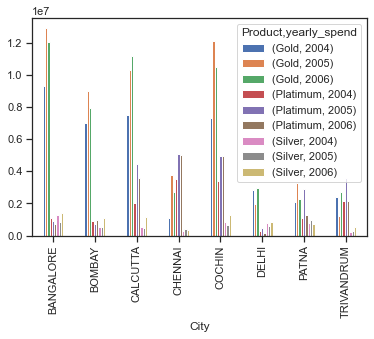

In [90]:
citywise_spend.plot(kind='bar')
plt.show()

### 4. Create graphs for a. Monthly comparison of total spends, city wise
  
 

In [92]:
customer_spend['monthly_spend']=customer_spend.Month.apply(lambda x:x.month)
print(customer_spend)

       No Customer   Age        City   Product     Limit Company  \
0       1       A1  76.0   BANGALORE      Gold  500000.0      C1   
1       1       A1  76.0   BANGALORE      Gold  500000.0      C1   
2       1       A1  76.0   BANGALORE      Gold  500000.0      C1   
3       1       A1  76.0   BANGALORE      Gold  500000.0      C1   
4       1       A1  76.0   BANGALORE      Gold  500000.0      C1   
...   ...      ...   ...         ...       ...       ...     ...   
1495   96      A96  54.0     CHENNAI    Silver  100000.0     C19   
1496   97      A97  58.0  TRIVANDRUM  Platimum   10000.0     C20   
1497   98      A98  51.0    CALCUTTA  Platimum   10001.0     C21   
1498   99      A99  35.0    CALCUTTA  Platimum   10002.0     C22   
1499  100     A100  36.0      COCHIN    Silver  100000.0      C5   

            Segment  Sl No:      Month        Type     Amount Age_Group  \
0     Self Employed       1 2004-01-12   JEWELLERY  485470.80    Senior   
1     Self Employed       2 2004-

In [94]:
spend1=pd.pivot_table(data = customer_spend,index = 'City',columns='monthly_spend',values='Amount', aggfunc='sum')
print(spend)

      Sl No: Customer      Month        Type     Amount
0          1       A1 2004-01-12   JEWELLERY  485470.80
1          2       A1 2004-01-03       PETRO  410556.13
2          3       A1 2004-01-15     CLOTHES   23740.46
3          4       A1 2004-01-25        FOOD  484342.47
4          5       A1 2005-01-17      CAMERA  369694.07
...      ...      ...        ...         ...        ...
1495    1496      A67 2006-02-04  BUS TICKET  356872.73
1496    1497      A68 2006-03-25  BUS TICKET  204971.10
1497    1498      A69 2006-03-31  BUS TICKET   50449.44
1498    1499      A70 2006-03-23  BUS TICKET   80593.94
1499    1500      A71 2006-03-24  BUS TICKET  194447.62

[1500 rows x 5 columns]


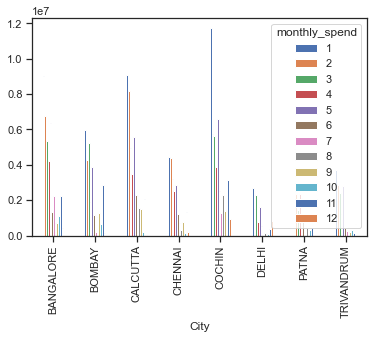

In [95]:
spend1.plot(kind='bar')
plt.show()

### b. Comparison of yearly spend on air tickets

In [97]:
spend2=pd.pivot_table(data = customer_spend[customer_spend.Type=='AIR TICKET'],index = 'Type', columns='yearly_spend', values='Amount', aggfunc='sum')
print(spend2)

yearly_spend        2004         2005        2006
Type                                             
AIR TICKET    4357225.35  10550152.21  5248469.56


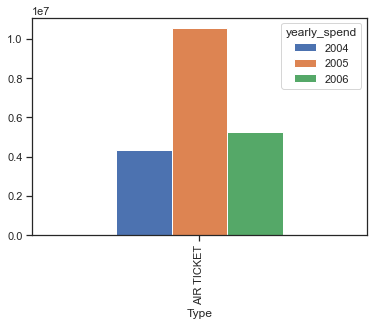

In [98]:
spend2.plot(kind='bar')
plt.show()

###  c. Comparison of monthly spend for each product (look for any seasonality that exists in terms of spend)

In [99]:
spend3=pd.pivot_table(data = customer_spend,index = 'monthly_spend',columns='Product',values='Amount', aggfunc='sum')
print(spend3)

Product               Gold     Platimum      Silver
monthly_spend                                      
1              32413831.83  14951578.51  4206383.62
2              24779179.55   9134054.58  2087018.37
3              19256972.48   7288837.68  3909405.83
4              13170572.59   5182493.86  1902322.65
5              21548169.76   8151926.49  2140940.01
6               6538862.64   2965712.71   689537.61
7               5167416.37   1288156.26   530153.72
8               4954030.42   1714762.80   293109.82
9               3816887.62   1667840.84   442803.13
10              3018223.38    550275.04   100001.50
11              9203267.46   2741618.42   691102.63
12              2332940.96    750156.19   200537.90


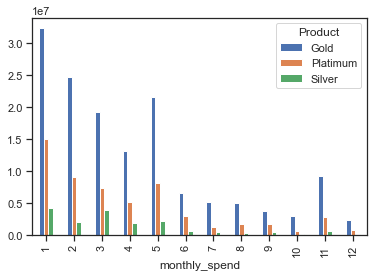

In [103]:
spend3.plot(kind='bar')
plt.show()

### 5. Write user defined PYTHON function to perform the following analysis:

In [130]:
customer_repayment['yearly']=customer_repayment.Month.apply(lambda x:x.year)
customer_repayment['monthly']=customer_repayment.Month.apply(lambda x:x.month)
print(customer_repayment)

       No Customer   Age        City   Product     Limit Company  \
0       1       A1  76.0   BANGALORE      Gold  500000.0      C1   
1       1       A1  76.0   BANGALORE      Gold  500000.0      C1   
2       1       A1  76.0   BANGALORE      Gold  500000.0      C1   
3       1       A1  76.0   BANGALORE      Gold  500000.0      C1   
4       1       A1  76.0   BANGALORE      Gold  500000.0      C1   
...   ...      ...   ...         ...       ...       ...     ...   
1495   96      A96  54.0     CHENNAI    Silver  100000.0     C19   
1496   97      A97  58.0  TRIVANDRUM  Platimum   10000.0     C20   
1497   98      A98  51.0    CALCUTTA  Platimum   10001.0     C21   
1498   99      A99  35.0    CALCUTTA  Platimum   10002.0     C22   
1499  100     A100  36.0      COCHIN    Silver  100000.0      C5   

            Segment  SL No:      Month     Amount  Unnamed: 4  yearly  monthly  
0     Self Employed     NaN 2004-01-12  495414.75         NaN    2004        1  
1     Self Employed  

In [134]:
def topcustomers(product_category,time_period):
    return customer_repayment.loc[(customer_repayment.Product == product_category)].groupby(['Customer','City','Product',time_period]).Amount.sum().reset_index().sort_values('Amount',ascending=False).head(10)

In [137]:
product_category=str(input("Enter Product Category"))
time_period=str(input("Enter Time Period"))

Enter Product CategoryPlatimum
Enter Time Periodmonthly


In [138]:
top10customers(product_category,time_period)

,Customer,City,Product,monthly,Amount
114,A41,COCHIN,Platimum,1,2089998.54
118,A41,COCHIN,Platimum,5,1999863.05
106,A40,CALCUTTA,Platimum,1,1749083.51
94,A39,TRIVANDRUM,Platimum,5,1668976.58
80,A38,CHENNAI,Platimum,1,1655584.31
90,A39,TRIVANDRUM,Platimum,1,1565119.57
208,A56,CHENNAI,Platimum,3,1500854.63
109,A40,CALCUTTA,Platimum,5,1401293.97
81,A38,CHENNAI,Platimum,2,1365681.76
91,A39,TRIVANDRUM,Platimum,2,1212860.65
